# Search Queries Anomalies : Case Study

Search Queries Anomaly Detection means identifying queries that are outliers according to their performance metrics. It is valuable for businesses to spot potential issues or opportunities, such as unexpectedly high or low CTRs. If you want to learn how to detect anomalies in search queries, this article is for you. In this article, I’ll take you through the task of Search Queries Anomaly Detection with Machine Learning using Python

Search Queries Anomaly Detection refers to the process of identifying unusual patterns or outliers in search query data that deviate significantly from the norm.

The dataset we have contains search queries that lead users to a specific website, along with associated metrics. The columns in this dataset are:

- Top Queries: The actual search terms used by users.
- Clicks: The number of times users clicked on the website after using the query.
- Impressions: The number of times the website appeared in search results for the query.
- CTR (Click Through Rate): The ratio of clicks to impressions, indicating the effectiveness of the query in leading users to the website.
- Position: The average ranking of the website in search results for the query.
The problem at hand is to utilize the available dataset to detect anomalies in search queries — queries that perform significantly differently from the majority. The goal is to identify queries that are either underperforming or overperforming in terms of clicks, impressions, CTR, and search position

## Search Queries Anomaly Detection: Process We Can Follow
Search Queries Anomaly Detection is a technique to identify unusual or unexpected patterns in search query data. Below is the process we can follow for the task of Search Queries Anomaly Detection:

1.Gather historical search query data from the source, such as a search engine or a website’s search functionality.\
2.Conduct an initial analysis to understand the distribution of search queries, their frequency, and any noticeable patterns or trends.\
3.Create relevant features or attributes from the search query data that can aid in anomaly detection.\
4.Choose an appropriate anomaly detection algorithm. Common methods include statistical approaches like Z-score analysis and machine learning algorithms like Isolation Forests or One-Class SVM.\
5.Train the selected model on the prepared data.\
6.Apply the trained model to the search query data to identify anomalies or outliers.\

Now, let's get started with the task of search queries anomaly detection by importing the necessary python librarires and the dataset

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'

queries_df = pd.read_csv(r"Dataset/Queries.csv")
queries_df.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02
2,python projects with source code,2077,73380,2.83%,5.94
3,classification report in machine learning,2012,4959,40.57%,1.28
4,the clever programmer,1931,2528,76.38%,1.09


# EDA 
let's look at column insights before going foreward

In [3]:
queries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [7]:
queries_df['CTR'].to_list()[0:10]

['35.83%',
 '81.28%',
 '2.83%',
 '40.57%',
 '76.38%',
 '21.38%',
 '25.9%',
 '10.71%',
 '28.73%',
 '37.7%']

We will remove '%' sign from values,so it will be numeric

In [11]:
queries_df['CTR'] = queries_df['CTR'].str.replace('%','').astype('float')/100

In [12]:
queries_df.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09


In [13]:
re.findall(r"\b[a-zA-Z]+\b",queries_df['Top queries'][0].lower())

['number', 'guessing', 'game', 'python']

In [14]:
# function to clean and split queries into words
def clean_and_split(query):
    words = re.findall(r"\b[a-zA-Z]+\b",query.lower())
    return words

# split each query into words and count the frequency of each word
word_counts = Counter()
for query in queries_df['Top queries']:
    word_counts.update(clean_and_split(query))

word_freq_df = pd.DataFrame(word_counts.most_common(20),columns =['word','frequency'])



In [15]:
word_freq_df.head()

,word,frequency
0,python,562
1,in,232
2,code,138
3,learning,133
4,machine,123


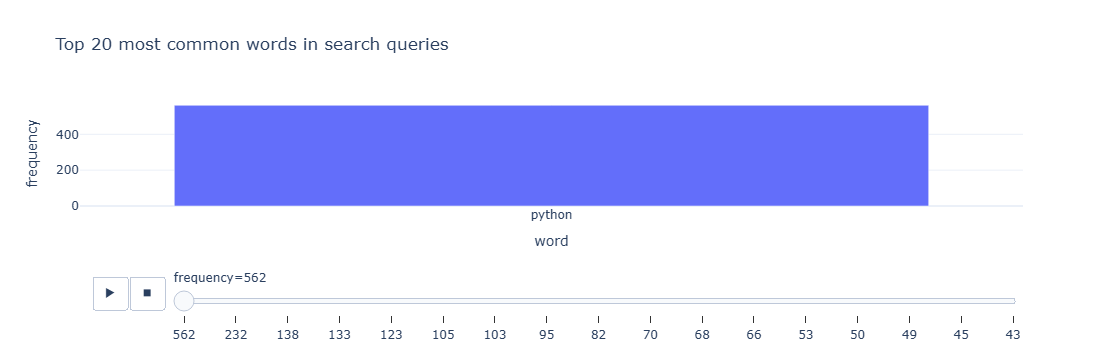

In [17]:
# plotting the word frequencies
fig = px.bar(word_freq_df,x = 'word',y = 'frequency',title = 'Top 20 most common words in search queries',animation_frame='frequency')
fig.show()

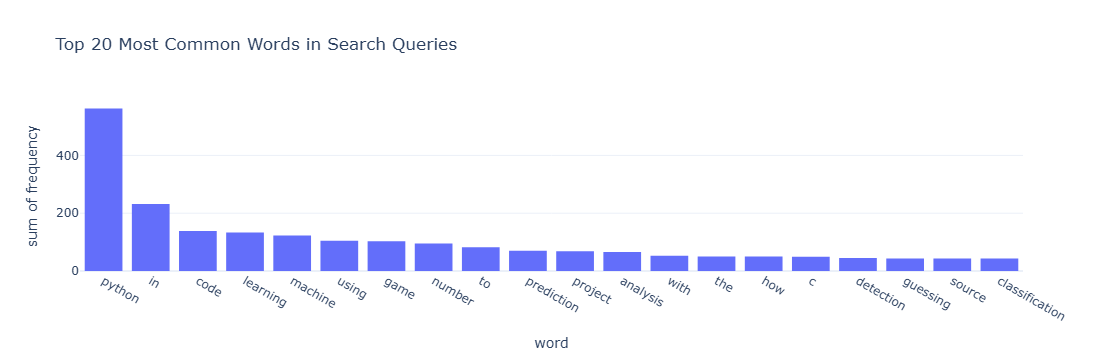

In [21]:
# Plotting the word frequencies
fig = px.histogram(word_freq_df, x ='word',y='frequency',title='Top 20 Most Common Words in Search Queries')
fig.show()

Lets have look at top queries by impression and clicks

In [34]:

# Top queries by clicks and Impressions
top_queries_clicks_vis = queries_df.nlargest(10,'Clicks')[['Top queries','Clicks']]
top_queries_impressions_vis = queries_df.nlargest(10,'Impressions')[['Top queries','Impressions']]

In [35]:
queries_df.nlargest(10,'Clicks')[['Top queries','Clicks']]

,Top queries,Clicks
0,number guessing game python,5223
1,thecleverprogrammer,2809
2,python projects with source code,2077
3,classification report in machine learning,2012
4,the clever programmer,1931
5,standard scaler in machine learning,1559
6,aman kharwal,1490
7,python turtle graphics code,1455
8,python game projects with source code,1421
9,82 python projects with source code,1343


In [36]:
queries_df.nlargest(10,'Impressions')[['Top queries','Impressions']]

,Top queries,Impressions
2,python projects with source code,73380
82,r2 score,56322
34,machine learning roadmap,42715
21,classification report,39896
232,standardscaler,39267
91,facebook programming languages,36055
15,rock paper scissors python,35824
36,pandas datareader,26663
180,classification_report,24917
54,pandas_datareader,24689


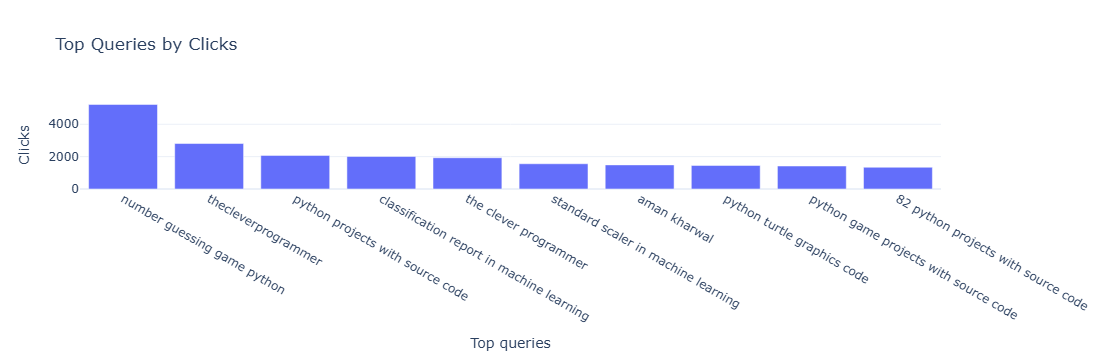

In [37]:

# Plotting
fig_clicks = px.bar(top_queries_clicks_vis, x ='Top queries',y = 'Clicks',title = 'Top Queries by Clicks')
fig_clicks.show()

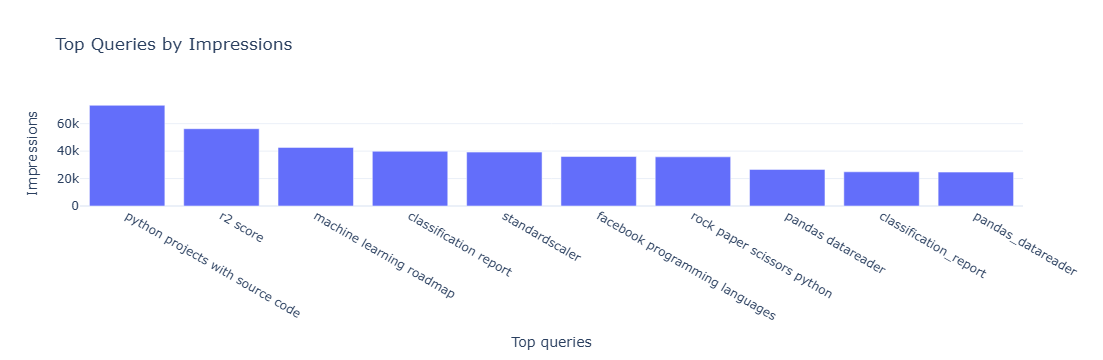

In [39]:
fig_impressions = px.bar(top_queries_impressions_vis, x = 'Top queries',y= 'Impressions',title = 'Top Queries by Impressions')
fig_impressions.show()

- Lets analyze the query with highest and lowest CTRs

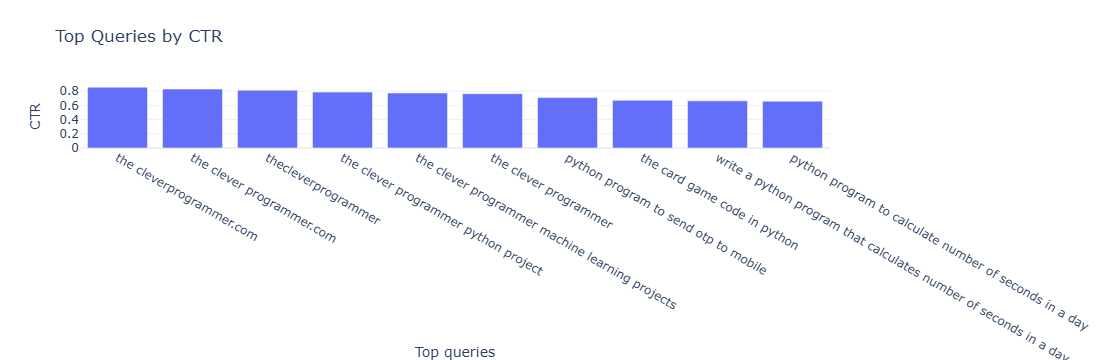

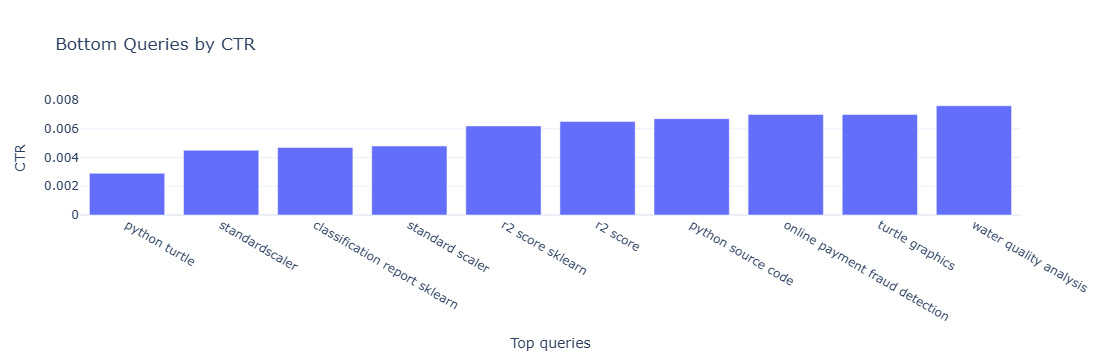

In [41]:
top_ctr_vis = queries_df.nlargest(10,'CTR')[['Top queries','CTR']]
bottom_ctr_vis = queries_df.nsmallest(10,'CTR')[['Top queries','CTR']]

fig_top_ctr = px.bar(top_ctr_vis,x = 'Top queries',y = 'CTR',title = 'Top Queries by CTR')
fig_bottom_ctr = px.bar(bottom_ctr_vis,x= 'Top queries',y = 'CTR',title = 'Bottom Queries by CTR')
fig_top_ctr.show()
fig_bottom_ctr.show()

- Lets look at correaltion between feature

In [43]:
queries_df.columns

Index(['Top queries', 'Clicks', 'Impressions', 'CTR', 'Position'], dtype='object')

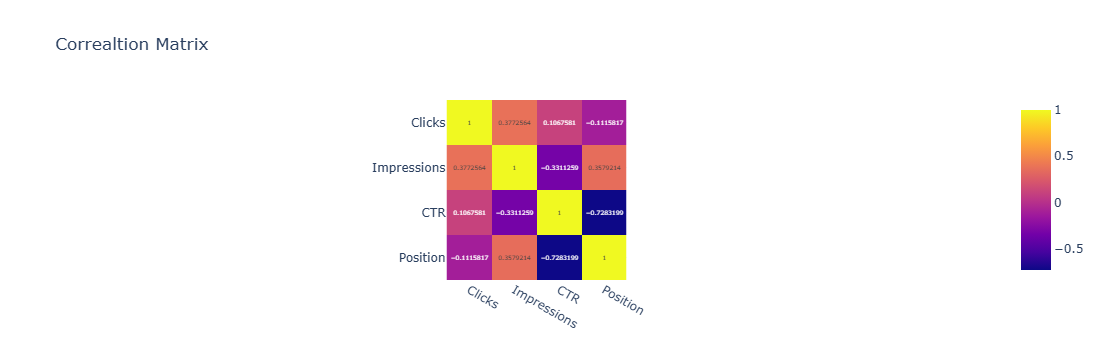

In [44]:
fig_corr = px.imshow(queries_df[['Clicks','Impressions','CTR','Position']].corr(),text_auto =True,title = 'Correaltion Matrix')
fig_corr.show()

In this correlation matrix:

* Clicks and Impressions are positively correlated, meaning more Impressions tend to lead to more Clicks.
* Clicks and CTR have a weak positive correlation, implying that more Clicks might slightly increase the Click-Through Rate.
* Clicks and Position are weakly negatively correlated, suggesting that higher ad or page Positions may result in fewer Clicks.
* Impressions and CTR are negatively correlated, indicating that higher Impressions tend to result in a lower Click-Through Rate.
* Impressions and Position are positively correlated, indicating that ads or pages in higher Positions receive more Impressions.
* CTR and Position have a strong negative correlation, meaning that higher Positions result in lower Click-Through Rates.

# Detecting Anomalies in Search Queries

Now, let's detect anomalies in search queries . You can use varioues techniques for anomaly detection. A simple and effective methods is the Isolation Forest alogrithm,which works well with different data distributions and is effecient with large dataset

In [45]:
from sklearn.ensemble import IsolationForest

# Selecting relevent features
features = queries_df[['Clicks','Impressions','CTR','Position']]

# Initializing Isolation Forest
iso_forest = IsolationForest(n_estimators = 100,contamination = 0.01) # contamination is expected proportion of outliers

# fitting the model
iso_forest.fit(features)

# Predicting anomalies
queries_df['anomaly'] = iso_forest.predict(features)

# Filtering out the anomalies
anomalies = queries_df[queries_df['anomaly'] == -1]

In [46]:
anomalies.head()

,Top queries,Clicks,Impressions,CTR,Position,anomaly
0,number guessing game python,5223,14578,0.3583,1.61,-1
1,thecleverprogrammer,2809,3456,0.8128,1.02,-1
2,python projects with source code,2077,73380,0.0283,5.94,-1
4,the clever programmer,1931,2528,0.7638,1.09,-1
15,rock paper scissors python,1111,35824,0.0310,7.19,-1


The anomalies in our search query data are not just outlies .They are indicators of potiential areas for growth,optimization, and strategic focus.These anomalies are reflacting emarging trends or areas of growing interest.Staying responsve to these trends will help in maintaing and growing the website's relevance and user engagement.


# Summery
So, Search Queries Anomaly Detection means identifing queries that are outliers according to their performance metrics. It is valueable for businesses to spot potential issues or oppertunities ,such as unexpectedly high or low CTRs. I